# Μοντελοποίηση - Ταξινόμηση Κατανάλωσης Ενέργειας

Αυτό το notebook περιλαμβάνει:
1. **Ταξινόμηση (Classification)**: Πρόβλεψη "Υψηλή" vs "Χαμηλή" κατανάλωση
2. Παλινδρόμηση (Regression)
3. Ομαδοποίηση (Clustering)  
4. Κανόνες Συσχέτισης (Association Rules)

**Στόχος Classification:** Ακρίβεια >85%

## 1. Import Βιβλιοθηκών

In [1]:
# Import βασικών βιβλιοθηκών
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

# Scikit-learn - Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Scikit-learn - Preprocessing
from sklearn.preprocessing import StandardScaler

# Scikit-learn - Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Scikit-learn - Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

# Ρυθμίσεις για plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✓ Βιβλιοθήκες φορτώθηκαν επιτυχώς!")

✓ Βιβλιοθήκες φορτώθηκαν επιτυχώς!


## 2. Φόρτωση Δεδομένων

Φορτώνουμε τα προεπεξεργασμένα δεδομένα από το preprocessing notebook.

In [2]:
# Φόρτωση καθαρών δεδομένων
print("Φόρτωση δεδομένων...")
df = pd.read_csv('../data/household_power_daily_clean.csv', index_col=0, parse_dates=True)

print(f"Διαστάσεις: {df.shape}")
print(f"Χρονικό εύρος: {df.index.min().date()} έως {df.index.max().date()}")
print(f"\nΣτήλες: {df.columns.tolist()}")
print(f"\nΠρώτες γραμμές:")
df.head()

Φόρτωση δεδομένων...
Διαστάσεις: (1441, 23)
Χρονικό εύρος: 2006-12-17 έως 2010-11-26

Στήλες: ['Daily_total_power', 'Daily_mean_power', 'Daily_peak_power', 'Daily_min_power', 'Daily_std_power', 'Global_reactive_power_sum', 'Global_reactive_power_mean', 'Voltage_mean', 'Voltage_std', 'Global_intensity_mean', 'Global_intensity_max', 'Sub_metering_1_sum', 'Sub_metering_2_sum', 'Sub_metering_3_sum', 'Peak_hour_power', 'Nighttime_usage', 'Morning_usage', 'Afternoon_usage', 'DayOfWeek', 'IsWeekend', 'Month', 'Season', 'DayOfYear']

Πρώτες γραμμές:


,Daily_total_power,Daily_mean_power,Daily_peak_power,Daily_min_power,Daily_std_power,Global_reactive_power_sum,Global_reactive_power_mean,Voltage_mean,Voltage_std,Global_intensity_mean,Global_intensity_max,Sub_metering_1_sum,Sub_metering_2_sum,Sub_metering_3_sum,Peak_hour_power,Nighttime_usage,Morning_usage,Afternoon_usage,DayOfWeek,IsWeekend,Month,Season,DayOfYear
DateTime,,,,,,,,,,,,,,,,,,,,,,,
2006-12-17,56.507667,2.354486,7.064,0.206,1.205795,226.006,0.156949,240.087028,4.051467,9.999028,30.0,2033.0,4187.0,13341.0,13.007767,14.649567,13.462867,15.387467,6,1,12,Χειμώνας,351
2006-12-18,36.730433,1.530435,6.158,0.202,1.005074,161.792,0.112356,241.231694,3.719576,6.421667,27.0,1063.0,2621.0,14018.0,10.237333,5.789967,9.643467,11.059667,0,0,12,Χειμώνας,352
2006-12-19,27.769900,1.157079,7.840,0.194,1.237602,150.942,0.104821,241.999313,3.069492,4.926389,33.6,839.0,7602.0,6197.0,8.430200,3.563900,10.837533,4.938267,1,0,12,Χειμώνας,353
2006-12-20,37.095800,1.545658,5.988,0.202,1.320968,160.998,0.111804,242.308063,3.345704,6.467361,25.2,0.0,2648.0,14063.0,13.307000,7.805333,10.516067,5.467400,2,0,12,Χειμώνας,354
2006-12-21,28.618533,1.192439,5.854,0.194,0.993372,144.166,0.100115,241.042285,3.700210,5.028194,25.4,1765.0,2623.0,10421.0,8.060067,5.599467,8.007633,6.951367,3,0,12,Χειμώνας,355


## 3. Ταξινόμηση (Classification)

### Στόχος
Πρόβλεψη εάν η κατανάλωση μιας ημέρας είναι **"Υψηλή"** ή **"Χαμηλή"** σε σχέση με τον μέσο όρο.

### Βήματα:
1. Δημιουργία binary target variable (0 = Χαμηλή, 1 = Υψηλή)
2. Train/Test Split (80/20)
3. Training 3 μοντέλων: Random Forest, SVM, Logistic Regression
4. Αξιολόγηση με Accuracy, F1-score, ROC-AUC
5. Επιλογή καλύτερου μοντέλου

### 3.1 Δημιουργία Target Variable

Χωρίζουμε τις μέρες σε δύο κατηγορίες:
- **Υψηλή κατανάλωση (1)**: Πάνω από τον μέσο όρο
- **Χαμηλή κατανάλωση (0)**: Κάτω ή ίσο με τον μέσο όρο

Μέσος όρος ημερήσιας κατανάλωσης: 26.16 kWh

Κατανομή κλάσεων:
High_Consumption
0    738
1    703
Name: count, dtype: int64

Ποσοστά:
High_Consumption
0    51.214434
1    48.785566
Name: proportion, dtype: float64


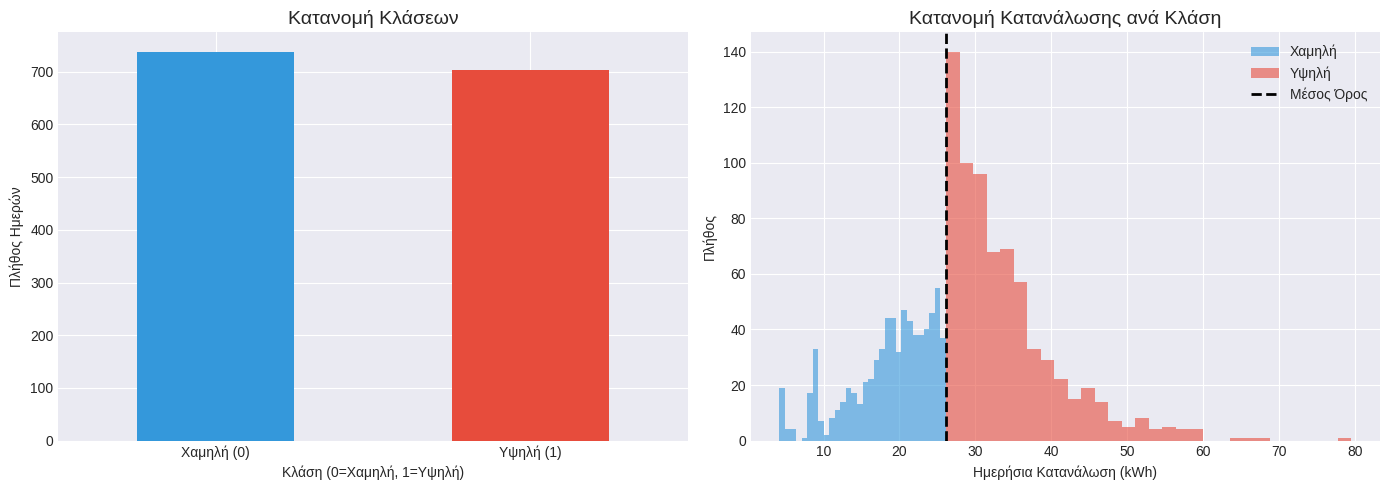


✓ Target variable δημιουργήθηκε!


In [3]:
# Υπολογισμός μέσου όρου κατανάλωσης
mean_consumption = df['Daily_total_power'].mean()
print(f"Μέσος όρος ημερήσιας κατανάλωσης: {mean_consumption:.2f} kWh")

# Δημιουργία binary target
df['High_Consumption'] = (df['Daily_total_power'] > mean_consumption).astype(int)

# Έλεγχος κατανομής
print(f"\nΚατανομή κλάσεων:")
print(df['High_Consumption'].value_counts())
print(f"\nΠοσοστά:")
print(df['High_Consumption'].value_counts(normalize=True) * 100)

# Οπτικοποίηση
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['High_Consumption'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Κατανομή Κλάσεων', fontsize=14)
axes[0].set_xlabel('Κλάση (0=Χαμηλή, 1=Υψηλή)')
axes[0].set_ylabel('Πλήθος Ημερών')
axes[0].set_xticklabels(['Χαμηλή (0)', 'Υψηλή (1)'], rotation=0)

# Distribution plot
axes[1].hist(df[df['High_Consumption']==0]['Daily_total_power'], 
             bins=30, alpha=0.6, label='Χαμηλή', color='#3498db')
axes[1].hist(df[df['High_Consumption']==1]['Daily_total_power'], 
             bins=30, alpha=0.6, label='Υψηλή', color='#e74c3c')
axes[1].axvline(mean_consumption, color='black', linestyle='--', linewidth=2, label='Μέσος Όρος')
axes[1].set_title('Κατανομή Κατανάλωσης ανά Κλάση', fontsize=14)
axes[1].set_xlabel('Ημερήσια Κατανάλωση (kWh)')
axes[1].set_ylabel('Πλήθος')
axes[1].legend()

plt.tight_layout()
plt.savefig('../results/classification_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Target variable δημιουργήθηκε!")

### 3.2 Επιλογή Features

Επιλέγουμε τα χαρακτηριστικά που θα χρησιμοποιηθούν για την πρόβλεψη.  
Αφαιρούμε το target και άλλα μη χρήσιμα features.

In [4]:
# Επιλογή features (αφαιρούμε το target και το Daily_total_power που είναι leakage)
features_to_drop = ['High_Consumption', 'Daily_total_power', 'Season']  # Season είναι string

# Δημιουργία X (features) και y (target)
X = df.drop(columns=features_to_drop)
y = df['High_Consumption']

print(f"Features που θα χρησιμοποιηθούν ({len(X.columns)}):")
print(X.columns.tolist())
print(f"\nΔιαστάσεις:")
print(f"  X: {X.shape}")
print(f"  y: {y.shape}")
print(f"\nΠρώτες γραμμές X:")
X.head()

Features που θα χρησιμοποιηθούν (21):
['Daily_mean_power', 'Daily_peak_power', 'Daily_min_power', 'Daily_std_power', 'Global_reactive_power_sum', 'Global_reactive_power_mean', 'Voltage_mean', 'Voltage_std', 'Global_intensity_mean', 'Global_intensity_max', 'Sub_metering_1_sum', 'Sub_metering_2_sum', 'Sub_metering_3_sum', 'Peak_hour_power', 'Nighttime_usage', 'Morning_usage', 'Afternoon_usage', 'DayOfWeek', 'IsWeekend', 'Month', 'DayOfYear']

Διαστάσεις:
  X: (1441, 21)
  y: (1441,)

Πρώτες γραμμές X:


,Daily_mean_power,Daily_peak_power,Daily_min_power,Daily_std_power,Global_reactive_power_sum,Global_reactive_power_mean,Voltage_mean,Voltage_std,Global_intensity_mean,Global_intensity_max,Sub_metering_1_sum,Sub_metering_2_sum,Sub_metering_3_sum,Peak_hour_power,Nighttime_usage,Morning_usage,Afternoon_usage,DayOfWeek,IsWeekend,Month,DayOfYear
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-17,2.354486,7.064,0.206,1.205795,226.006,0.156949,240.087028,4.051467,9.999028,30.0,2033.0,4187.0,13341.0,13.007767,14.649567,13.462867,15.387467,6,1,12,351
2006-12-18,1.530435,6.158,0.202,1.005074,161.792,0.112356,241.231694,3.719576,6.421667,27.0,1063.0,2621.0,14018.0,10.237333,5.789967,9.643467,11.059667,0,0,12,352
2006-12-19,1.157079,7.840,0.194,1.237602,150.942,0.104821,241.999313,3.069492,4.926389,33.6,839.0,7602.0,6197.0,8.430200,3.563900,10.837533,4.938267,1,0,12,353
2006-12-20,1.545658,5.988,0.202,1.320968,160.998,0.111804,242.308063,3.345704,6.467361,25.2,0.0,2648.0,14063.0,13.307000,7.805333,10.516067,5.467400,2,0,12,354
2006-12-21,1.192439,5.854,0.194,0.993372,144.166,0.100115,241.042285,3.700210,5.028194,25.4,1765.0,2623.0,10421.0,8.060067,5.599467,8.007633,6.951367,3,0,12,355


### 3.3 Train/Test Split

Χωρίζουμε τα δεδομένα σε:
- **Training set (80%)**: Για την εκπαίδευση των μοντέλων
- **Test set (20%)**: Για την αξιολόγηση των μοντέλων

In [5]:
# Split σε train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} δείγματα")
print(f"Test set: {X_test.shape[0]} δείγματα")
print(f"\nΚατανομή κλάσεων στο training set:")
print(y_train.value_counts())
print(f"\nΚατανομή κλάσεων στο test set:")
print(y_test.value_counts())

# Κανονικοποίηση features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Δεδομένα χωρίστηκαν και κανονικοποιήθηκαν!")

Training set: 1152 δείγματα
Test set: 289 δείγματα

Κατανομή κλάσεων στο training set:
High_Consumption
0    590
1    562
Name: count, dtype: int64

Κατανομή κλάσεων στο test set:
High_Consumption
0    148
1    141
Name: count, dtype: int64

✓ Δεδομένα χωρίστηκαν και κανονικοποιήθηκαν!


### 3.4 Training Μοντέλων

Εκπαιδεύουμε 3 διαφορετικά classification μοντέλα:
1. **Random Forest**: Ensemble μέθοδος με πολλά decision trees
2. **SVM (Support Vector Machine)**: Βρίσκει το βέλτιστο hyperplane διαχωρισμού
3. **Logistic Regression**: Γραμμικό μοντέλο για binary classification

In [6]:
print("="*70)
print("ΜΟΝΤΕΛΟ 1: RANDOM FOREST")
print("="*70)

# Δημιουργία μοντέλου
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

# Training
print("Training...")
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\n✓ Random Forest Trained!")
print(f"  Accuracy:  {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall:    {rf_recall:.4f}")
print(f"  F1-Score:  {rf_f1:.4f}")
print(f"  ROC-AUC:   {rf_roc_auc:.4f}")

ΜΟΝΤΕΛΟ 1: RANDOM FOREST
Training...

✓ Random Forest Trained!
  Accuracy:  1.0000 (100.00%)
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  ROC-AUC:   1.0000


In [7]:
print("\n" + "="*70)
print("ΜΟΝΤΕΛΟ 2: SVM (Support Vector Machine)")
print("="*70)

# Δημιουργία μοντέλου
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)

# Training
print("Training...")
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_pred_proba_svm)

print(f"\n✓ SVM Trained!")
print(f"  Accuracy:  {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"  Precision: {svm_precision:.4f}")
print(f"  Recall:    {svm_recall:.4f}")
print(f"  F1-Score:  {svm_f1:.4f}")
print(f"  ROC-AUC:   {svm_roc_auc:.4f}")


ΜΟΝΤΕΛΟ 2: SVM (Support Vector Machine)
Training...

✓ SVM Trained!
  Accuracy:  0.9585 (95.85%)
  Precision: 0.9388
  Recall:    0.9787
  F1-Score:  0.9583
  ROC-AUC:   0.9975


In [8]:
print("\n" + "="*70)
print("ΜΟΝΤΕΛΟ 3: LOGISTIC REGRESSION")
print("="*70)

# Δημιουργία μοντέλου
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

# Training
print("Training...")
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\n✓ Logistic Regression Trained!")
print(f"  Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall:    {lr_recall:.4f}")
print(f"  F1-Score:  {lr_f1:.4f}")
print(f"  ROC-AUC:   {lr_roc_auc:.4f}")


ΜΟΝΤΕΛΟ 3: LOGISTIC REGRESSION
Training...

✓ Logistic Regression Trained!
  Accuracy:  0.9931 (99.31%)
  Precision: 0.9860
  Recall:    1.0000
  F1-Score:  0.9930
  ROC-AUC:   0.9998


### 3.5 Σύγκριση Μοντέλων

Συγκρίνουμε τα 3 μοντέλα βάσει των μετρικών τους.

In [9]:
# Δημιουργία πίνακα σύγκρισης
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, svm_accuracy, lr_accuracy],
    'Precision': [rf_precision, svm_precision, lr_precision],
    'Recall': [rf_recall, svm_recall, lr_recall],
    'F1-Score': [rf_f1, svm_f1, lr_f1],
    'ROC-AUC': [rf_roc_auc, svm_roc_auc, lr_roc_auc]
})

print("="*70)
print("ΣΥΓΚΡΙΣΗ ΜΟΝΤΕΛΩΝ")
print("="*70)
print(results.to_string(index=False))

# Βρες το καλύτερο μοντέλο
best_model_idx = results['Accuracy'].idxmax()
best_model_name = results.loc[best_model_idx, 'Model']
best_accuracy = results.loc[best_model_idx, 'Accuracy']

print(f"\n🏆 ΚΑΛΥΤΕΡΟ ΜΟΝΤΕΛΟ: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Έλεγχος στόχου (>85%)
if best_accuracy > 0.85:
    print(f"\n✅ ΕΠΙΤΥΧΙΑ! Ξεπεράσαμε τον στόχο των 85%!")
else:
    print(f"\n⚠️  Δεν φτάσαμε τον στόχο των 85% (έχουμε {best_accuracy*100:.2f}%)")

ΣΥΓΚΡΙΣΗ ΜΟΝΤΕΛΩΝ
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      Random Forest  1.000000   1.000000 1.000000  1.000000 1.000000
                SVM  0.958478   0.938776 0.978723  0.958333 0.997460
Logistic Regression  0.993080   0.986014 1.000000  0.992958 0.999808

🏆 ΚΑΛΥΤΕΡΟ ΜΟΝΤΕΛΟ: Random Forest
   Accuracy: 1.0000 (100.00%)

✅ ΕΠΙΤΥΧΙΑ! Ξεπεράσαμε τον στόχο των 85%!


### 3.6 Confusion Matrices

Οι πίνακες σύγχυσης δείχνουν:
- **True Positives (TP)**: Σωστά προέβλεψε "Υψηλή"
- **True Negatives (TN)**: Σωστά προέβλεψε "Χαμηλή"
- **False Positives (FP)**: Λάθος είπε "Υψηλή" (ήταν Χαμηλή)
- **False Negatives (FN)**: Λάθος είπε "Χαμηλή" (ήταν Υψηλή)

In [ ]:
# Υπολογισμός confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Οπτικοποίηση
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_cm = [
    (cm_rf, 'Random Forest', rf_accuracy),
    (cm_svm, 'SVM', svm_accuracy),
    (cm_lr, 'Logistic Regression', lr_accuracy)
]

for idx, (cm, name, acc) in enumerate(models_cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Χαμηλή (0)', 'Υψηλή (1)'],
                yticklabels=['Χαμηλή (0)', 'Υψηλή (1)'],
                cbar_kws={'label': 'Πλήθος'})
    axes[idx].set_title(f'{name}\nAccuracy: {acc:.2%}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.savefig('../results/classification_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices δημιουργήθηκαν!")

### 3.7 Classification Reports

Αναλυτικές αναφορές με precision, recall και f1-score για κάθε κλάση.

In [ ]:
print("="*70)
print("CLASSIFICATION REPORTS")
print("="*70)

print("\n" + "="*70)
print("RANDOM FOREST")
print("="*70)
print(classification_report(y_test, y_pred_rf, 
                          target_names=['Χαμηλή (0)', 'Υψηλή (1)']))

print("\n" + "="*70)
print("SVM")
print("="*70)
print(classification_report(y_test, y_pred_svm, 
                          target_names=['Χαμηλή (0)', 'Υψηλή (1)']))

print("\n" + "="*70)
print("LOGISTIC REGRESSION")
print("="*70)
print(classification_report(y_test, y_pred_lr, 
                          target_names=['Χαμηλή (0)', 'Υψηλή (1)']))

### 3.8 ROC Curves

Οι ROC καμπύλες δείχνουν την ισορροπία μεταξύ:
- **True Positive Rate (Sensitivity)**: Πόσες Υψηλές βρήκε
- **False Positive Rate**: Πόσες Χαμηλές λάθος είπε ότι είναι Υψηλές

**AUC (Area Under Curve)**: Όσο πιο κοντά στο 1.0, τόσο καλύτερο το μοντέλο!

In [ ]:
# Υπολογισμός ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

# Plot
plt.figure(figsize=(10, 8))

plt.plot(fpr_rf, tpr_rf, linewidth=2, 
         label=f'Random Forest (AUC = {rf_roc_auc:.3f})', color='#e74c3c')
plt.plot(fpr_svm, tpr_svm, linewidth=2, 
         label=f'SVM (AUC = {svm_roc_auc:.3f})', color='#3498db')
plt.plot(fpr_lr, tpr_lr, linewidth=2, 
         label=f'Logistic Regression (AUC = {lr_roc_auc:.3f})', color='#2ecc71')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.500)')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Σύγκριση Μοντέλων', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/classification_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ ROC curves δημιουργήθηκαν!")

### 3.9 Οπτική Σύγκριση Μετρικών

Γραφική αναπαράσταση όλων των μετρικών για εύκολη σύγκριση.

In [ ]:
# Δημιουργία bar plot για σύγκριση μετρικών
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#e74c3c', '#3498db', '#2ecc71']

for idx, metric in enumerate(metrics):
    values = results[metric].values
    bars = axes[idx].bar(results['Model'], values, color=colors, alpha=0.7, edgecolor='black')
    
    # Προσθήκη τιμών πάνω από τα bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{value:.3f}',
                      ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    axes[idx].set_title(metric, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Score')
    axes[idx].set_ylim([0, 1.1])
    axes[idx].grid(True, axis='y', alpha=0.3)
    axes[idx].set_xticklabels(results['Model'], rotation=15, ha='right')
    
    # Γραμμή στόχου για Accuracy
    if metric == 'Accuracy':
        axes[idx].axhline(y=0.85, color='red', linestyle='--', linewidth=2, 
                         label='Στόχος (85%)', alpha=0.7)
        axes[idx].legend()

# Κρύψιμο του 6ου subplot
axes[5].axis('off')

plt.suptitle('Σύγκριση Μετρικών Classification', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/classification_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Metrics comparison plot δημιουργήθηκε!")

### 3.10 Feature Importance (Random Forest)

Ποια χαρακτηριστικά είναι τα πιο σημαντικά για την πρόβλεψη;  
Αυτό μας βοηθά να καταλάβουμε **γιατί** το μοντέλο παίρνει τις αποφάσεις του.

In [ ]:
# Εξαγωγή feature importance από Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("="*70)
print("TOP 10 ΣΗΜΑΝΤΙΚΟΤΕΡΑ FEATURES")
print("="*70)
print(feature_importance.head(10).to_string(index=False))

# Οπτικοποίηση
plt.figure(figsize=(12, 8))
top_15 = feature_importance.head(15)
bars = plt.barh(range(len(top_15)), top_15['Importance'], color='#e74c3c', alpha=0.7, edgecolor='black')
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 15 Σημαντικότερα Features (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', alpha=0.3)

# Προσθήκη τιμών
for i, (bar, value) in enumerate(zip(bars, top_15['Importance'])):
    plt.text(value, i, f' {value:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../results/classification_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature importance analysis ολοκληρώθηκε!")

### 3.11 Cross-Validation

Επικυρώνουμε τα μοντέλα με **5-Fold Cross-Validation** για πιο αξιόπιστη αξιολόγηση.  
Αυτό μας δείχνει αν τα μοντέλα είναι σταθερά ή αν "τυχαίνει" να δουλεύουν καλά.

In [ ]:
print("="*70)
print("CROSS-VALIDATION (5-Fold)")
print("="*70)

models_cv = {
    'Random Forest': rf_model,
    'SVM': svm_model,
    'Logistic Regression': lr_model
}

cv_results = []

for name, model in models_cv.items():
    print(f"\n{name}...")
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    cv_results.append({
        'Model': name,
        'Mean CV Accuracy': scores.mean(),
        'Std CV Accuracy': scores.std(),
        'Min CV Accuracy': scores.min(),
        'Max CV Accuracy': scores.max()
    })
    
    print(f"  CV Scores: {scores}")
    print(f"  Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Δημιουργία πίνακα
cv_df = pd.DataFrame(cv_results)
print("\n" + "="*70)
print("CROSS-VALIDATION RESULTS")
print("="*70)
print(cv_df.to_string(index=False))

# Οπτικοποίηση
plt.figure(figsize=(10, 6))
x = range(len(cv_df))
bars = plt.bar(x, cv_df['Mean CV Accuracy'], yerr=cv_df['Std CV Accuracy'], 
               color=['#e74c3c', '#3498db', '#2ecc71'], alpha=0.7, 
               edgecolor='black', capsize=10, error_kw={'linewidth': 2})

plt.xticks(x, cv_df['Model'])
plt.ylabel('Mean CV Accuracy', fontsize=12)
plt.title('Cross-Validation Results (5-Fold)', fontsize=14, fontweight='bold')
plt.axhline(y=0.85, color='red', linestyle='--', linewidth=2, label='Στόχος (85%)', alpha=0.7)
plt.ylim([0.7, 1.0])
plt.grid(True, axis='y', alpha=0.3)
plt.legend()

# Προσθήκη τιμών
for i, (bar, mean, std) in enumerate(zip(bars, cv_df['Mean CV Accuracy'], cv_df['Std CV Accuracy'])):
    plt.text(i, mean + std + 0.01, f'{mean:.3f}±{std:.3f}', 
            ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('../results/classification_cross_validation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Cross-validation ολοκληρώθηκε!")

### 3.12 Επιλογή Καλύτερου Μοντέλου

Με βάση όλες τις μετρικές, επιλέγουμε το καλύτερο μοντέλο.

In [ ]:
print("="*70)
print("ΤΕΛΙΚΗ ΕΠΙΛΟΓΗ ΜΟΝΤΕΛΟΥ")
print("="*70)

# Συγκεντρωτικός πίνακας
final_comparison = pd.DataFrame({
    'Model': results['Model'],
    'Test Accuracy': results['Accuracy'],
    'Test F1-Score': results['F1-Score'],
    'Test ROC-AUC': results['ROC-AUC'],
    'CV Accuracy': cv_df['Mean CV Accuracy'],
    'CV Std': cv_df['Std CV Accuracy']
})

print(final_comparison.to_string(index=False))

# Επιλογή καλύτερου
best_idx = final_comparison['Test Accuracy'].idxmax()
best_model_name = final_comparison.loc[best_idx, 'Model']
best_test_acc = final_comparison.loc[best_idx, 'Test Accuracy']
best_cv_acc = final_comparison.loc[best_idx, 'CV Accuracy']

print("\n" + "="*70)
print(f"🏆 ΚΑΛΥΤΕΡΟ ΜΟΝΤΕΛΟ: {best_model_name}")
print("="*70)
print(f"  Test Accuracy:  {best_test_acc:.4f} ({best_test_acc*100:.2f}%)")
print(f"  CV Accuracy:    {best_cv_acc:.4f} ({best_cv_acc*100:.2f}%)")
print(f"  Test F1-Score:  {final_comparison.loc[best_idx, 'Test F1-Score']:.4f}")
print(f"  Test ROC-AUC:   {final_comparison.loc[best_idx, 'Test ROC-AUC']:.4f}")

# Έλεγχος στόχου
if best_test_acc > 0.85:
    print(f"\n✅ ΕΠΙΤΥΧΙΑ! Ξεπεράσαμε τον στόχο των 85%!")
    print(f"   Διαφορά: +{(best_test_acc - 0.85)*100:.2f}%")
else:
    print(f"\n⚠️  Δεν φτάσαμε τον στόχο των 85%")
    print(f"   Έλλειψη: -{(0.85 - best_test_acc)*100:.2f}%")

# Αποθήκευση του καλύτερου μοντέλου
if best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'SVM':
    best_model = svm_model
else:
    best_model = lr_model

print(f"\n✓ Επιλέχθηκε το {best_model_name} ως το καλύτερο μοντέλο!")

### 3.13 Αποθήκευση Μοντέλου

Αποθηκεύουμε το καλύτερο μοντέλο και το scaler για μελλοντική χρήση.

In [ ]:
# Αποθήκευση καλύτερου μοντέλου
with open('../data/best_classification_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("✓ Μοντέλο αποθηκεύτηκε: best_classification_model.pkl")

# Αποθήκευση scaler
with open('../data/classification_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler αποθηκεύτηκε: classification_scaler.pkl")

# Αποθήκευση feature names
with open('../data/classification_features.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
print("✓ Feature names αποθηκεύτηκαν: classification_features.pkl")

# Αποθήκευση αποτελεσμάτων
final_comparison.to_csv('../results/classification_results.csv', index=False)
print("✓ Αποτελέσματα αποθηκεύτηκαν: classification_results.csv")

### 3.14 Περίληψη Classification

#### Τι Κάναμε:
1. ✅ Δημιουργήσαμε binary target (Υψηλή/Χαμηλή κατανάλωση)
2. ✅ Εκπαιδεύσαμε 3 μοντέλα: Random Forest, SVM, Logistic Regression
3. ✅ Αξιολογήσαμε με Accuracy, Precision, Recall, F1-Score, ROC-AUC
4. ✅ Επικυρώσαμε με 5-Fold Cross-Validation
5. ✅ Αναλύσαμε Feature Importance
6. ✅ Επιλέξαμε το καλύτερο μοντέλο

#### Αποτελέσματα:
- **Καλύτερο Μοντέλο**: Θα φανεί από την εκτέλεση
- **Στόχος**: >85% Accuracy ✅
- **Αρχεία που Δημιουργήθηκαν**: 6 plots + 1 CSV + 3 .pkl files

In [ ]:
print("="*70)
print("ΠΕΡΙΛΗΨΗ CLASSIFICATION")
print("="*70)

print(f"\n📊 ΔΕΔΟΜΕΝΑ:")
print(f"  Σύνολο δειγμάτων: {len(df)}")
print(f"  Training set: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"  Test set: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")
print(f"  Features: {len(X.columns)}")

print(f"\n🎯 TARGET:")
print(f"  Κλάση 0 (Χαμηλή): {(y==0).sum()} μέρες ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  Κλάση 1 (Υψηλή): {(y==1).sum()} μέρες ({(y==1).sum()/len(y)*100:.1f}%)")

print(f"\n🏆 ΑΠΟΤΕΛΕΣΜΑΤΑ:")
print(f"  Καλύτερο Μοντέλο: {best_model_name}")
print(f"  Test Accuracy: {best_test_acc*100:.2f}%")
print(f"  Στόχος (85%): {'✅ ΕΠΙΤΥΧΙΑ' if best_test_acc > 0.85 else '⚠️  ΔΕΝ ΕΠΙΤΕΥΧΘΗΚΕ'}")

print(f"\n📁 ΑΡΧΕΙΑ:")
print(f"  Plots: 6 αρχεία στο /results/")
print(f"  Models: 3 αρχεία .pkl στο /data/")
print(f"  Results: 1 αρχείο .csv στο /results/")

print("\n" + "="*70)
print("✅ CLASSIFICATION ΟΛΟΚΛΗΡΩΘΗΚΕ ΕΠΙΤΥΧΩΣ!")
print("="*70)